### Visualize How Models Create Embeddings:

#### 1. Load Models
#### 2. Convert Words into Vector Embeddings
#### 3. Create Sentence Embeddings
#### 3. Visualise 2D Projection of Embeddings
#### 4. Visualise 3D Projection of Embeddings

In [1]:
#Load Glove and Word2Vec Models:
import gensim
from gensim.models import Word2Vec
import gensim.downloader as api

glove_model = None;
try:
    glove_model = gensim.models.KeyedVectors.load("./glovemodel.mod")
    print("Loaded glove model")
except:
    glove_model = api.load('glove-twitter-25')
    glove_model.save("./glovemodel.mod")
    print("Saved glove model")

v2w_model = None;
try:
    v2w_model = gensim.models.KeyedVectors.load("./w2vecmodel.mod")
    print("Loaded W2Vec model")
except:
    v2w_model = api.load('word2vec-google-news-300')
    glove_model.save("./w2vecmodel.mod")
    print("Saved W2Vec model")

w2vec_embedding_size=len(v2w_model['computer'])
glove_embedding_size=len(glove_model['computer'])


#Start BERT server

Loaded glove model
Loaded W2Vec model


In [2]:
#Start BERT Server
#*Please make sure BERT Server Client is running in background*
#*Refer: https://bert-as-service.readthedocs.io/en/latest/section/get-start.html

from bert_serving.client import BertClient
bc = BertClient()

example = bc.encode(['dummy'])

print(example.size)

768


### Heat Map of Embeddings

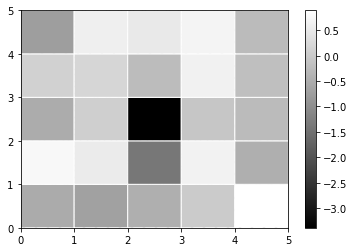

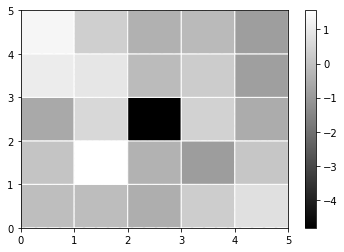

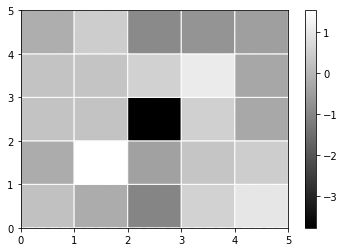

In [4]:
#Visualize Glove Embeddings as Heat Map:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Words to create heat maps of
words = ['shape','person','human']

plot_counter = 1

for word in words:
    
    word_embedding = glove_model[word]
    
    word_mat = np.reshape(word_embedding,newshape=(5,5))
    
    fig, ax = plt.subplots(plot_counter)
    
    im = ax.pcolormesh(word_mat, cmap=cm.gray, edgecolors='white', linewidths=1, antialiased=True)
    fig.colorbar(im)

    ax.patch.set(hatch='xx', edgecolor='black')

    
plt.show()

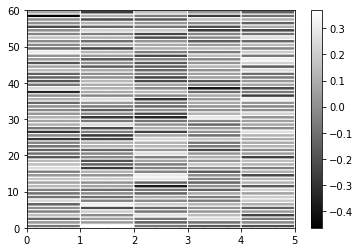

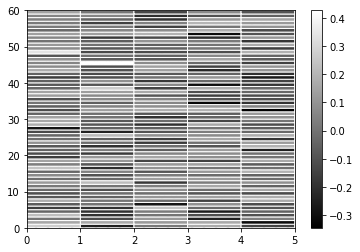

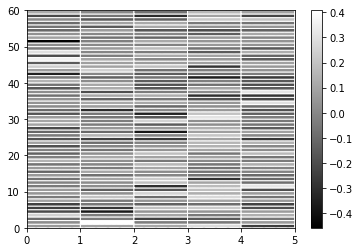

In [5]:
#Visualize Google News Embeddings as Heat Map:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Words to create heat maps of
words = ['shape','person','human']

plot_counter = 1

for word in words:
    
    word_embedding = v2w_model[word]
    
    word_mat = np.reshape(word_embedding,newshape=(60,5))
    
    fig, ax = plt.subplots(plot_counter)
    
    im = ax.pcolormesh(word_mat, cmap=cm.gray, edgecolors='white', linewidths=1, antialiased=True)
    fig.colorbar(im)

    ax.patch.set(hatch='xx', edgecolor='black')

    
plt.show()

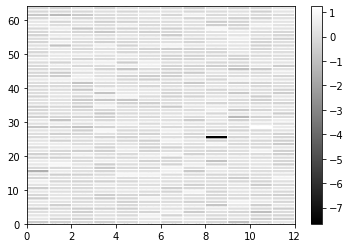

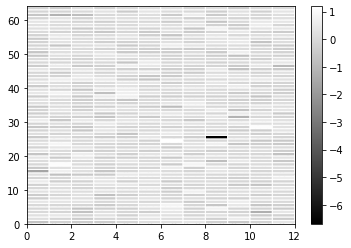

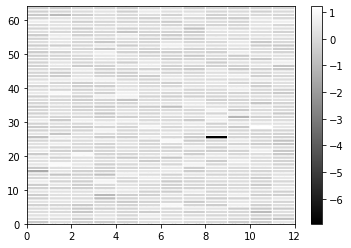

In [6]:
#Visualize BERT Embeddings as Heat Map:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Words to create heat maps of
words = ['shape','person','human']

plot_counter = 1

for word in words:
    
    word_embedding = bc.encode([word])
    word_mat = np.reshape(word_embedding,newshape=(64,12))
    
    fig, ax = plt.subplots(plot_counter)
    im = ax.pcolormesh(word_mat, cmap=cm.gray, edgecolors='white', linewidths=1, antialiased=True)
    fig.colorbar(im)
    ax.patch.set(hatch='xx', edgecolor='black')

plt.show()

### Sentence Embedding

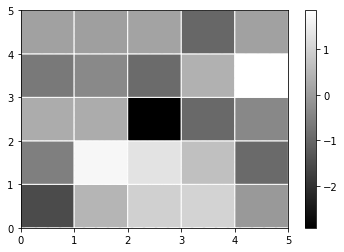

In [7]:
#Sentence embeddings works similar to word embedding
#Glove and Google News add or subtract word embeddings to create sentence vectors
#BERT can process sentences directly

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Any model can be used here
sen_emb = glove_model['king'] + glove_model['boy'] - glove_model['man'] 

sen_mat = np.reshape(sen_emb,newshape=(5,5))

fig, ax = plt.subplots()
im = ax.pcolormesh(sen_mat, cmap=cm.gray, edgecolors='white', linewidths=1,
                   antialiased=True)
fig.colorbar(im)

ax.patch.set(hatch='xx', edgecolor='black')

plt.show()

### 2D Representation of Word Clusters


In [8]:
#Function to plot 2D Plot:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(8, 6))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a,label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


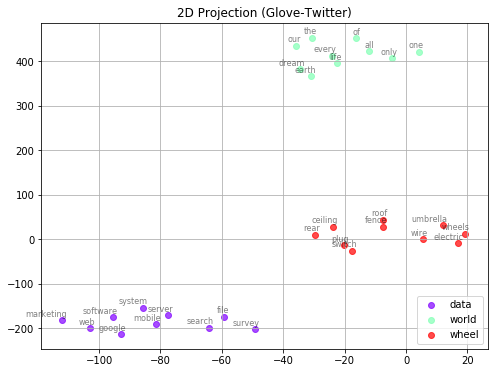

In [9]:
#Words to plot for Glove Model:

keys = ['data','world','wheel']

embedding_clusters_gl = []
word_clusters_gl = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in glove_model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(glove_model[similar_word])
    embedding_clusters_gl.append(embeddings)
    word_clusters_gl.append(words)
    
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters_gl = np.array(embedding_clusters_gl)
n, m, k = embedding_clusters_gl.shape
tsne_model_en_2d = TSNE(perplexity=6, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters_gl.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('2D Projection (Glove-Twitter)', keys, embeddings_en_2d, word_clusters_gl, 0.7,
                        'similar_words.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


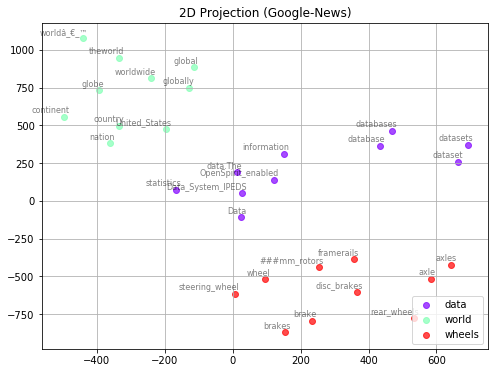

In [10]:
#Words to plot for Word-2-Vec Model:

keys = ['data','world','wheels']

embedding_clusters_gn = []
word_clusters_gn = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in v2w_model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(v2w_model[similar_word])
    embedding_clusters_gn.append(embeddings)
    word_clusters_gn.append(words)
    

from sklearn.manifold import TSNE
import numpy as np

embedding_clusters_gn = np.array(embedding_clusters_gn)
n, m, k = embedding_clusters_gn.shape

tsne_model_en_2d = TSNE(perplexity=7, n_components=2, init='pca', n_iter=3500, random_state=32)

embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters_gn.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('2D Projection (Google-News)', keys, embeddings_en_2d, word_clusters_gn, 0.7,
                        'similar_words.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


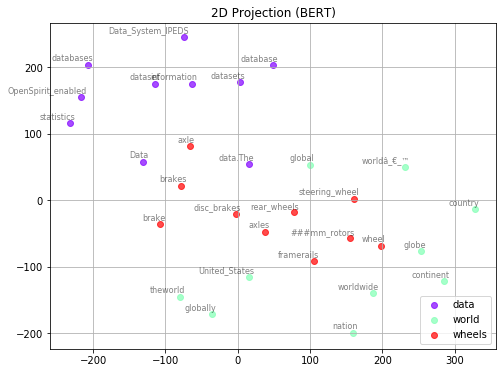

In [11]:
#Words to plot for BERT Model:

keys = ['data','world','wheels']

embedding_clusters_bt = []
word_clusters_bt = []

#Uses Glove to find similar words (BERT does not have this functionality)
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in glove_model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(bc.encode([similar_word]))
    embedding_clusters_bt.append(embeddings)
    word_clusters_bt.append(words)
    

from sklearn.manifold import TSNE
import numpy as np

embedding_clusters_bt = np.array(embedding_clusters_bt)
n, m, dum, k = embedding_clusters_bt.shape

tsne_model_en_2d = TSNE(perplexity=7, n_components=2, init='pca', n_iter=3500, random_state=32)


embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters_bt.reshape(n * m, k))).reshape(n, m, 2)

tsne_plot_similar_words('2D Projection (BERT)', keys, embeddings_en_2d, word_clusters_gn, 0.7,
                        'similar_words.png')

### 3D Projection of Word Embeddings
#### Projections are created using Tensorflow Embedding Projector
#### Link: https://projector.tensorflow.org/

In [12]:
#This code creates the files used on the embedding projector
#Sreenshots attached in the report

#List of words to create projection of
keys = ['boy','man','human','person','girl','guy','queen','king','plane','guitar','music','travel','planet','water','fire','beach','sun','rock','data','technology','book','food','hear','known','well','shine']

print(len(keys))
emb = []
label = []

#Generates similar words and appends into an array
for words in keys:
    emb.append(glove_model[words])
    label.append(words)
    for word,_ in glove_model.most_similar(words,topn=30):
        emb.append(glove_model[word])
        label.append(word)
    
emb_arr = np.array(emb)
label_arr = np.array(label)

print(emb_arr.shape)
print(label_arr.shape)

#Store labels for vectors
np.savetxt("tensor_labels.txt", label_arr, delimiter="\t", fmt='%s')

#Store vectors
np.savetxt("tensor_glove.txt", emb_arr, delimiter="\t")

26
(806, 25)
(806,)
